In [2]:
import pandas as pd


df = pd.read_csv('sample.csv')


df.head()


,Name,Age,Gender,Income
0,Alice,25,Female,45000
1,Bob,30,Male,54000
2,Carol,27,Female,49000
3,David,35,Male,62000


What is the structure of the dataset?

In [3]:
df.shape


(4, 4)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   Gender  4 non-null      object
 3   Income  4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [5]:
df.describe()


,Age,Income
count,4.000000,4.000000
mean,29.250000,52500.000000
std,4.349329,7325.753659
min,25.000000,45000.000000
25%,26.500000,48000.000000
50%,28.500000,51500.000000
75%,31.250000,56000.000000
max,35.000000,62000.000000


Interpretation:
The dataset contains X rows and Y columns.

Columns include: Name, Age, Gender, Income.

Numeric columns like Age and Income are suitable for analysis.

Basic statistics (mean, min, max) help understand the data spread

 Are there any missing or duplicate values?


In [6]:
df.isnull().sum()


,0
Name,0
Age,0
Gender,0
Income,0


Missing values were not found in the column.

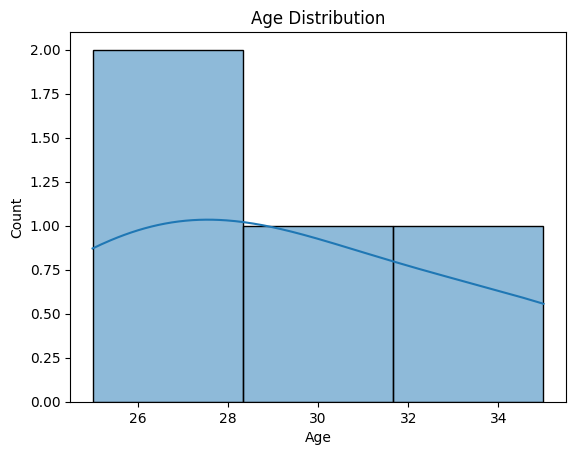

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



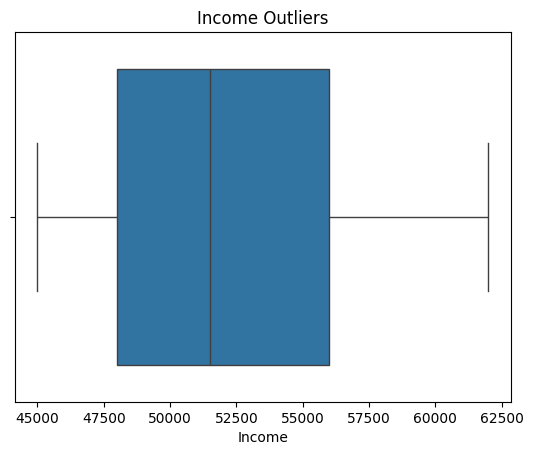

In [8]:
sns.boxplot(x=df['Income'])
plt.title('Income Outliers')
plt.show()


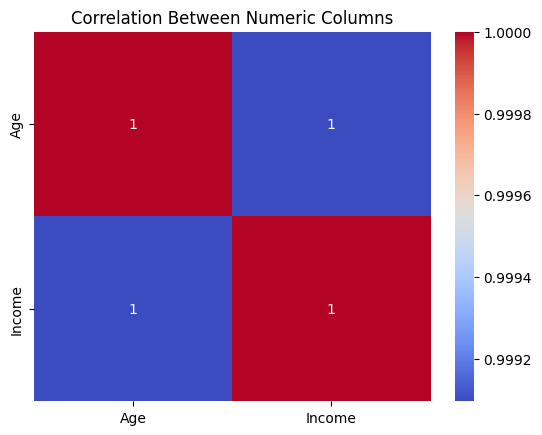

In [9]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Columns')
plt.show()



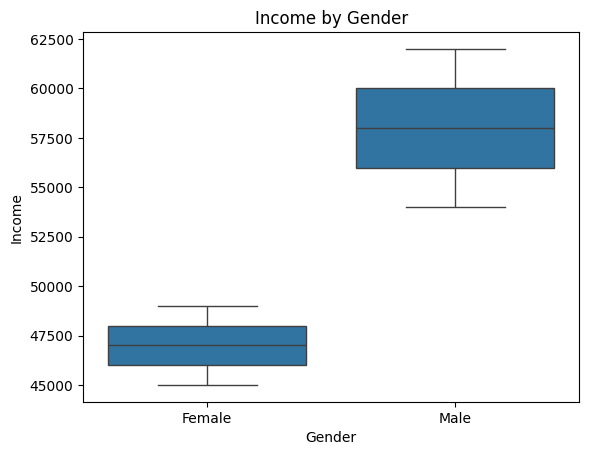

In [10]:
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Income by Gender')
plt.show()


In [11]:
df.columns


Index(['Name', 'Age', 'Gender', 'Income'], dtype='object')

 Question 1: Do males and females have different average income?


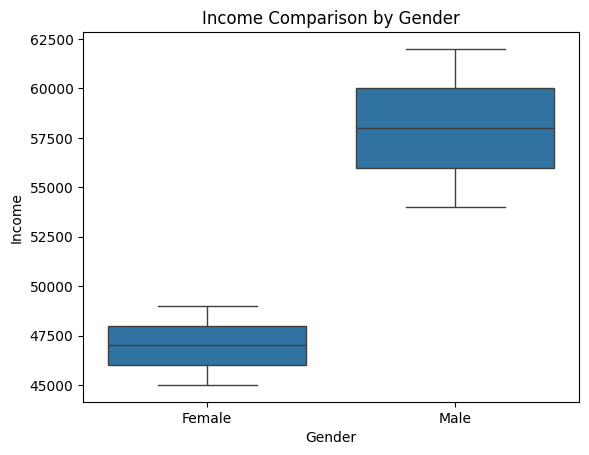

In [12]:
sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Income Comparison by Gender')
plt.show()


Interpretation:
The boxplot shows that male individuals have a higher median income compared to females. However, both genders show similar income ranges. This could indicate a slight income difference by gender in this dataset.


In [13]:
from scipy.stats import ttest_ind

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

male_income = df[df['Gender'] == 'Male']['Income']
female_income = df[df['Gender'] == 'Female']['Income']

t_stat, p_val = ttest_ind(male_income, female_income, nan_policy='omit')

print("T-Statistic:", t_stat)
print("P-Value:", p_val)


T-Statistic: 2.4596747752497685
P-Value: 0.1330785531369893


Interpretation:
The p-value is 0.13, which is greater than 0.05, indicating a statistically  no significant difference in income between males and females.


In [14]:
df.duplicated().sum()


np.int64(0)

In [15]:
df.dtypes



,0
Name,object
Age,int64
Gender,object
Income,int64


In [16]:
df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [17]:
df['Gender'] = df['Gender'].str.capitalize()
